Dado um sinal representado por um array $f$. A DFT do sinal é calculada através da equação:
\begin{equation}
F_m = \sum_{n=0}^{M-1} f_n e^{\frac{-2\pi imn}{M}}
\end{equation}
onde $M$ é o tamanho do array, $n$ e $m$ são os índices dos arrays $f$ e $F$ (array resultante), e $f_n$ indica o elemento de índice $n$ do array $f$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def DFT(fn):
    
    M = len(fn)
    Fm = np.zeros(M, dtype=np.complex)
    for m in range(M):
        for n in range(M):
            Fm[m] += fn[n]*np.exp(-1j*2*np.pi*m*n/M)
            
    return Fm

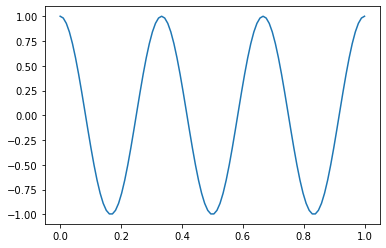

In [5]:
f = 3.
x = np.linspace(0, 1, 100)
y = np.cos(2*np.pi*f*x)
plt.plot(x, y)

[ 1.00000000e+00+0.00000000e+00j  1.12147087e+00+3.52436418e-02j
  1.76713595e+00+1.11178770e-01j  4.99542138e+01+4.72206349e+00j
 -1.33283751e+00-1.68376534e-01j -5.71034048e-01-9.04429082e-02j
 -3.34344165e-01-6.37795605e-02j -2.23229390e-01-4.98976805e-02j
 -1.60512490e-01-4.12126028e-02j -1.21109089e-01-3.51854430e-02j
 -9.45317559e-02-3.07152294e-02j -7.56696829e-02-2.72427622e-02j
 -6.17581967e-02-2.44517998e-02j -5.11833308e-02-2.21490051e-02j
 -4.29462704e-02-2.02089808e-02j -3.63996260e-02-1.85465358e-02j
 -3.11076806e-02-1.71015921e-02j -2.67678492e-02-1.58304619e-02j
 -2.31643592e-02-1.47005494e-02j -2.01398062e-02-1.36869981e-02j
 -1.75770776e-02-1.27704944e-02j -1.53875195e-02-1.19357836e-02j
 -1.35029878e-02-1.11706430e-02j -1.18703860e-02-1.04651530e-02j
 -1.04478356e-02-9.81117072e-03j -9.20194246e-03-9.20194246e-03j
 -8.10581254e-03-8.63181363e-03j -7.13759206e-03-8.09600900e-03j
 -6.27937764e-03-7.59046365e-03j -5.51639341e-03-7.11169153e-03j
 -4.83636266e-03-6.656682

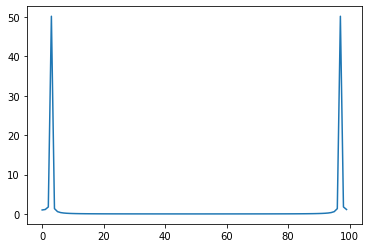

In [9]:
Fy = DFT(y)
print(Fy)
plt.plot(np.abs(Fy))

Calculo das frequências, usando o teorema de Nyquist

In [12]:
def DFT_frequency(x):
    
    M = len(x)
    delta_x = x[1]-x[0]
    f_max = 1/(2*delta_x)
    f_interval = 2*f_max
    delta_f = f_interval/M
    
    if M%2==0:
        half_M = M//2
        negative_frequencies = np.arange(-half_M, 0)*delta_f
        positive_frequencies = np.arange(0, half_M)*delta_f
        
    else:
        half_M = (M-1)//2
        negative_frequencies = np.arange(-half_M, 0)*delta_f
        positive_frequencies = np.arange(0, half_M+1)*delta_f
        
    frequencies = np.concatenate((positive_frequencies, negative_frequencies))
    
    return frequencies


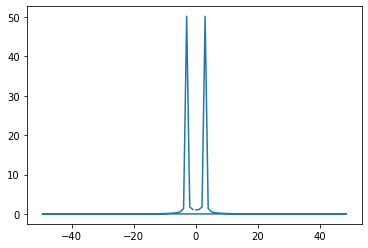

In [13]:
freqs = DFT_frequency(x)
plt.plot(freqs, np.abs(Fy))

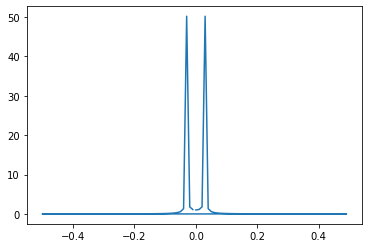

In [14]:
from scipy.fftpack import fft, fftfreq

Fy_scipy = fft(y)
freqs_scipy = fftfreq(len(x), x[-1]-x[0])
plt.plot(freqs_scipy, np.abs(Fy_scipy))